In [88]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [89]:
#The dataset contains no header for columns, hence the header parameter
dataframe=pd.read_csv('./mitbih_train.csv',header=None)

In [90]:
#Last column is the category column, a scaler value from 0 to 4
y=dataframe[dataframe.columns[-1:]]
x=dataframe[dataframe.columns[:-1]]

In [91]:
# Balances the dataset by oversampling it (it seems like it uses interpolation)
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
oversampler=SMOTE()
x,y=oversampler.fit_resample(x,y)

In [92]:
y=y.to_numpy()

In [93]:
x=x.to_numpy()

In [94]:
#Change the value to only use a subset of the dataset (like for quick tests...)
x=x[:362355][:][:]
y=y[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x=x.reshape([362355,187,1])

In [95]:
model=tf.keras.Sequential(
    [layers.Conv1D(7, 7, activation='relu', input_shape=(187,1)),
     layers.BatchNormalization(),
     layers.MaxPool1D(5),
     layers.Conv1D(5,5,activation='relu'),
     layers.BatchNormalization(),
     layers.Conv1D(3,3,activation='relu'),
     layers.BatchNormalization(),
     layers.GlobalMaxPool1D(),
     layers.Dense(5,activation='softmax')] #softmax cuz categories
)

In [96]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x,y,batch_size=500,epochs=20,verbose=True)

Epoch 1/20
725/725 [==============================] - 20s 20ms/step - loss: 1.9680 - accuracy: 0.1918
Epoch 2/20
725/725 [==============================] - 14s 20ms/step - loss: 0.8820 - accuracy: 0.6513
Epoch 3/20
725/725 [==============================] - 14s 19ms/step - loss: 0.6161 - accuracy: 0.7911
Epoch 4/20
725/725 [==============================] - 14s 20ms/step - loss: 0.5685 - accuracy: 0.8038
Epoch 5/20
725/725 [==============================] - 15s 21ms/step - loss: 0.5484 - accuracy: 0.8096
Epoch 6/20
725/725 [==============================] - 15s 20ms/step - loss: 0.5330 - accuracy: 0.8136
Epoch 7/20
725/725 [==============================] - 14s 20ms/step - loss: 0.5271 - accuracy: 0.8168
Epoch 8/20
725/725 [==============================] - 14s 20ms/step - loss: 0.5205 - accuracy: 0.8184
Epoch 9/20
725/725 [==============================] - 15s 20ms/step - loss: 0.5123 - accuracy: 0.8215
Epoch 10/20
725/725 [==============================] - 14s 20ms/step - loss: 0.507

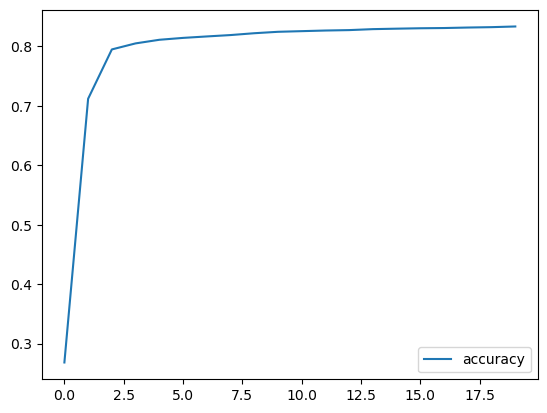

In [97]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(history.epoch, history.history['accuracy'],label='accuracy');
ax.legend()

In [98]:
dataframe=pd.read_csv('./mitbih_test.csv', header=None)
y = dataframe[dataframe.columns[-1:]]
x = dataframe[dataframe.columns[:-1]]
y = y.to_numpy()

x = x.to_numpy()

x = x[:21892][:][:]
y = y[:21892][:]
x = x.reshape([21892, 187, 1])
history.model.evaluate(x, y, batch_size=500, verbose=True)

44/44 [==============================] - 3s 73ms/step - loss: 0.5326 - accuracy: 0.8512


[0.5326300263404846, 0.8512241840362549]